In [83]:
"""

 This is a "Mass Analysis" program in Python

 Author:  Yuan-Yen Gary Peng 
 Email:   ypeng@cern.ch
 Version: 1.3.0
 Copyrghit: Yuan-Yen Peng
 Liscence: MIT License

"""

'\n\n This is a "Mass Analysis" program in Python\n\n Author:  Yuan-Yen Gary Peng \n Email:   ypeng@cern.ch\n Version: 1.3.0\n Copyrghit: Yuan-Yen Peng\n Liscence: MIT License\n\n'

In [84]:
import matplotlib.pyplot as plt
import numpy as np

In [85]:
path = '/Users/gary/Desktop/log.txt' # path to log file
binwidth = 1000 # number of bins

In [86]:
def hist(data, binwidth):
  '''
  Plot the histogram.
  :param data: read from the log.txt
  :param binwidth: set the width of bins 
  :param xlim: rset the width of histogram
  '''
  plt.hist(data, 
          bins = np.arange(min(data), max(data) + binwidth, binwidth), 
          density = False,
          stacked = False,
          histtype = 'stepfilled', # 'bar', 'step'...
          facecolor = 'g', 
          edgecolor = 'g', 
          alpha = 0.3)
  plt.xlabel("Values [MeV]")
  plt.ylabel("Frequency")
  plt.title(f"Histogram with binswidth = {binwidth} [MeV]")
  plt.show()


def info(data):
  '''
  Print the information about CGLMP.
  :param data: read from the log.txt
  '''
  num = len(data)
  sum = np.sum(data)
  avg = np.average(data)
  std = np.std(data)

  return np.array([num, sum, avg, std])

def mass(data, binwidth):
  '''
  Plot the desired information from the input files.
  :param data: read from the log.txt
  :param binwidth: set the width of bins
  :param xlim: rset the width of histogram
  '''
  hist(data, binwidth)
  print(f"The number of event is {int(info(data)[0])}")
  print(f"The sum is {float(info(data)[1])}")
  print(f"The average is {float(info(data)[2])}")
  print(f"The standard deviation is {float(info(data)[3])}")
  
  return

In [87]:
Wp = np.zeros(0) # initialize Wp
Wm = np.zeros(0) # initialize Wm
W = np.zeros(0) # initialize W
H = np.zeros(0) # initialize H

# read data from .txt file
# read lines of data with specified names
with open(path) as f:
    for line in f.readlines():
      s_Wp = line.split(' ')
      s_Wm = line.split(' ')
      s_W = line.split(' ')
      s_H = line.split(' ')
      # print(s_Wp)
      for i in range(0, len(s_Wp)):
        if s_Wp[i] == 'qualification':
          # print(s_Wp[i + 6])
          Wp = np.append(Wp, float(s_Wp[i + 6]))
          Wm = np.append(Wm, float(s_Wm[i + 7]))
          W = np.append(W, float(s_W[i + 8]))
          H = np.append(H, float(s_H[i + 9]))

The number of event is 8098


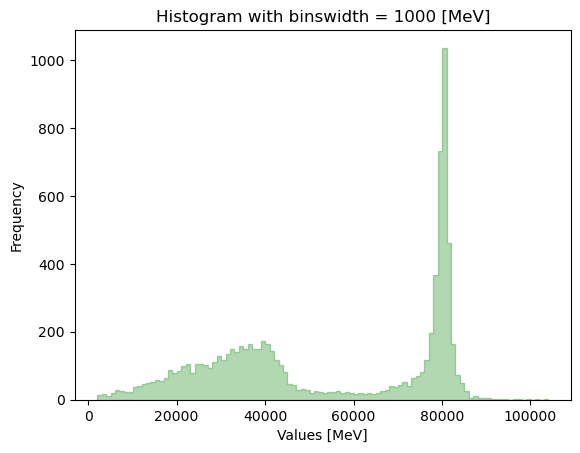

In [88]:
# for Wp

data = Wp
print(f"The number of event is {int(info(data)[0])}")
hist(data, binwidth)

The number of event is 8098


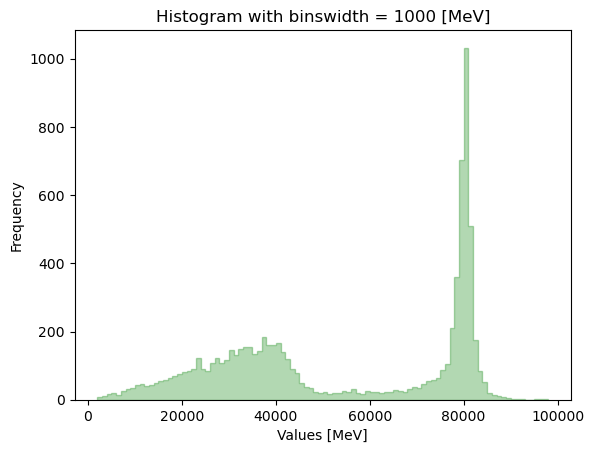

In [89]:
# for Wm
  
data = Wm
print(f"The number of event is {int(info(data)[0])}")
hist(data, binwidth)

The event number of Wp is 8098; 
the event number of Wm is 8098


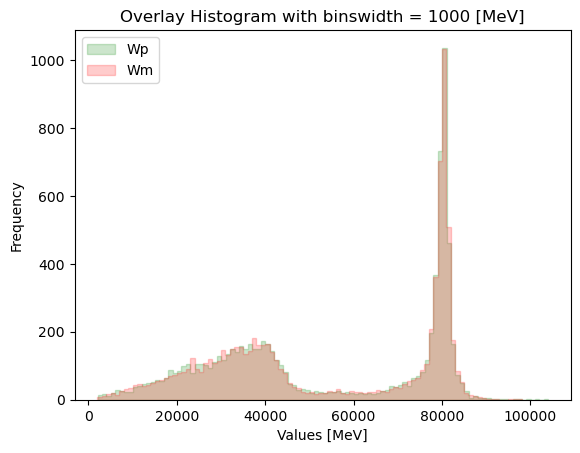

In [90]:
plt.hist(Wp, 
        bins = np.arange(min(Wp), max(Wp) + binwidth, binwidth), 
        density = False,
        stacked = False,
        histtype = 'stepfilled', # 'bar', 'step'...
        facecolor = 'g', 
        edgecolor = 'g', 
        alpha = 0.2,
        label = 'Wp')
plt.hist(Wm, 
        bins = np.arange(min(Wm), max(Wm) + binwidth, binwidth), 
        density = False,
        stacked = False,
        histtype = 'stepfilled', # 'bar', 'step'...
        facecolor = 'r', 
        edgecolor = 'r', 
        alpha = 0.2,
        label = 'Wm')

print(f'The event number of Wp is {np.size(Wp)}; \nthe event number of Wm is {np.size(Wm)}')
plt.legend(loc ='upper left')
plt.xlabel("Values [MeV]")
plt.ylabel("Frequency")
plt.title(f"Overlay Histogram with binswidth = {binwidth} [MeV]")
plt.show()


The number of event is 8098


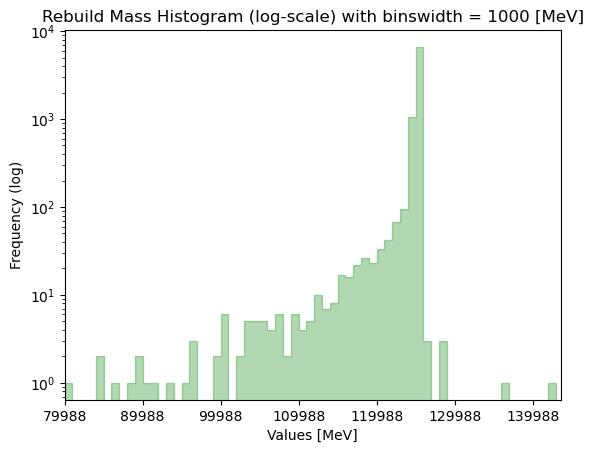

In [91]:
# Rebuild W (log-scale)

print(f"The number of event is {int(info(W)[0])}")

binwidth = 1000
plt.hist(W, 
        bins = np.arange(min(W), max(W) + binwidth, binwidth), 
        log = True,
        density = False,
        stacked = False,
        histtype = 'stepfilled', # 'bar', 'step'...
        facecolor = 'g', 
        edgecolor = 'g', 
        alpha = 0.3)

plt.xlim(min(W), max(W) + binwidth)
plt.xticks(np.arange(min(W), max(W) + binwidth, 10 * binwidth))
plt.xlabel("Values [MeV]")
plt.ylabel("Frequency (log)")
plt.title(f"Rebuild Mass Histogram (log-scale) with binswidth = {binwidth} [MeV]")
plt.show()

The number of event is 8098


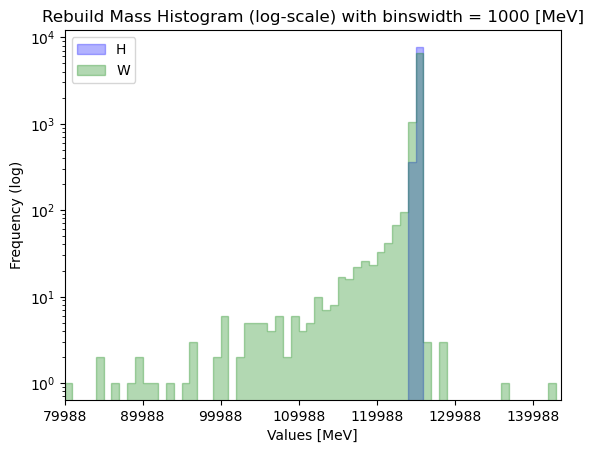

In [92]:
# Rebuild W vs Higgs mass (log-scale)

print(f"The number of event is {int(info(H)[0])}")


binwidth = 1000 
plt.hist(H, 
        bins = np.arange(min(W), max(W) + binwidth, binwidth), 
        density = False,
        stacked = False,
        histtype = 'stepfilled', # 'bar', 'step'...
        log = True,
        facecolor = 'b', 
        edgecolor = 'b', 
        alpha = 0.3,
        label = 'H')
plt.hist(W, 
        bins = np.arange(min(W), max(W) + binwidth, binwidth), 
        density = False,
        stacked = False,
        histtype = 'stepfilled', # 'bar', 'step'...
        log = True,
        facecolor = 'g', 
        edgecolor = 'g', 
        alpha = 0.3,
        label = 'W')

plt.legend(loc ='upper left')
plt.xlim(min(W), max(W) + binwidth)
plt.xticks(np.arange(min(W), max(W) + binwidth, 10 * binwidth))
plt.xlabel("Values [MeV]")
plt.ylabel("Frequency (log)")
plt.title(f"Rebuild Mass Histogram (log-scale) with binswidth = {binwidth} [MeV]")
plt.show()

The number of event is 8098


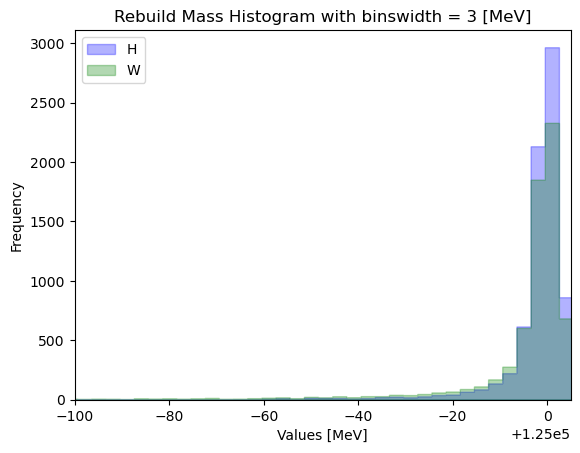

In [93]:
# Rebuild W vs Higgs mass

print(f"The number of event is {int(info(H)[0])}")


binwidth = 3
plt.hist(H, 
        bins = np.arange(min(W), max(W) + binwidth, binwidth), 
        density = False,
        stacked = False,
        histtype = 'stepfilled', # 'bar', 'step'...
        log = False,
        facecolor = 'b', 
        edgecolor = 'b', 
        alpha = 0.3,
        label = 'H')
plt.hist(W, 
        bins = np.arange(min(W), max(W) + binwidth, binwidth), 
        density = False,
        stacked = False,
        histtype = 'stepfilled', # 'bar', 'step'...
        log = False,
        facecolor = 'g', 
        edgecolor = 'g', 
        alpha = 0.3,
        label = 'W')

plt.legend(loc ='upper left')
plt.xlim(124900, 125005)
plt.xlabel("Values [MeV]")
plt.ylabel("Frequency")
plt.title(f"Rebuild Mass Histogram with binswidth = {binwidth} [MeV]")
plt.show()

The number of event is 8098


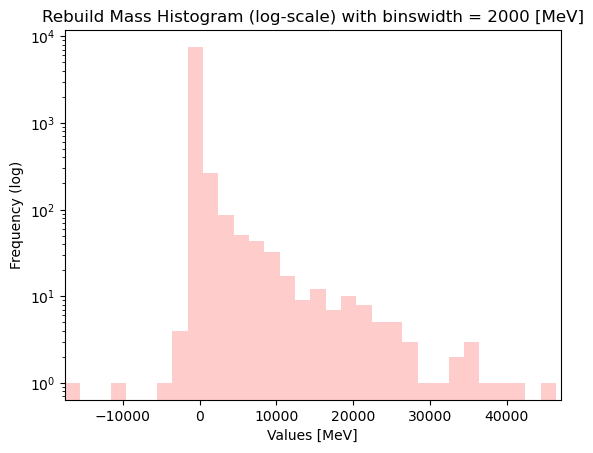

In [94]:
# Rebuild mass difference

print(f"The number of event is {int(info(H)[0])}")

binwidth = 2000

Diff = H - W
plt.hist(Diff, 
        bins = np.arange(min(Diff), max(Diff) + binwidth, binwidth), 
        log = True,
        density = False,
        stacked = False,
        histtype = 'stepfilled',
        facecolor = 'r', 
        edgecolor = 'None', 
        alpha = 0.2)

plt.xlim(min(Diff), max(Diff) + binwidth)
plt.xlabel("Values [MeV]")
plt.ylabel("Frequency (log)")
plt.title(f"Rebuild Mass Histogram (log-scale) with binswidth = {binwidth} [MeV]")
plt.show()

The number of event is 8098


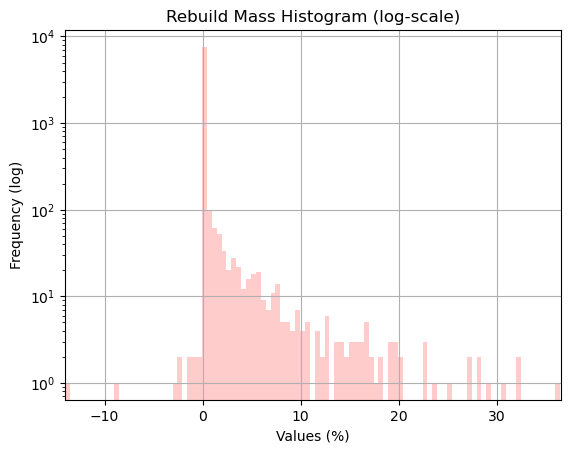

In [95]:
# Rebuild mass difference (log-scale / %)

print(f"The number of event is {int(info(H)[0])}")

binwidth = 0.5

Diff = 100 * (H - W)/H
plt.hist(Diff, 
        bins = np.arange(min(Diff), max(Diff) + binwidth, binwidth), 
        log = True,
        density = False,
        stacked = False,
        histtype = 'stepfilled',
        facecolor = 'r', 
        edgecolor = 'None', 
        alpha = 0.2)

plt.grid(True)
plt.xlim(min(Diff), max(Diff) + binwidth)
plt.xlabel("Values (%)")
plt.ylabel("Frequency (log)")
plt.title(f"Rebuild Mass Histogram (log-scale)")
plt.show()